## Introduction to Neural Networks

<br>
Artificial Neural Networks (ANN) is a machine learning algorithm inspired by how neurons work in our brain. A biological neuron is designed to receive inputs from environment or upstream neurons, transform the signal, then pass it to downstream neurons. Inputs come in the form of electric charges. When charges accumulate and membrane potential of the neuron exceeds a certain threshold, signals will be sent to connecting neurons in voltage spikes. The effect of different inputs are controlled by separate synaptic weights. As various inputs change with time, synapse weights adapt and a network of neurons can learn useful computations. Similarly, weights of ANN are updated as the network learn to perform a task without any predefined task-specific rules.   
<br>
A typical ANN consists of few main components, inputs, weights, and target outputs. Inputs are represented by real number values. The signal values go through several transformations by weights, eventually giving a value or a set of values as output. If output does not match target output, ANN would learn to tweak the weight values to make output of next iteration closer to target. Two main types of neural networks atchitechture are feed forward networks and recurrent networks. Feed forward networks train weights from one layer ot another, while for recurrent networks the transformed signal can be fed back to the same node and used to update weights. We will start with the most simple version of ANN, a one layer feed forward neural network.   

### 1. Perceptron

<br>
One way to appreciate the nuances of neural networks is to construct a perceptron. Perceptron is a linear binary classifer. Given inputs $x_i \ (i=1, 2, ...n)$ and binary output target $y$, the objective is to learn weights $w_i$ and bias term $b$, from which $y$ can be successfully classified with equation 
<br>
<br>
$$
\begin{equation*}
\hat{y} = f(\vec{x}) = 
\begin{cases}
1  & if & \sum_{i}w_i x_i + b > 0 \\
0  & if & \sum_{i}w_i x_i + b \le 0 \\
\end{cases}
\end{equation*}
$$
<br>
This example is equivalent to a neural network of one layer. The perceptron algorithm training procedures are:
1. If output is correct, we do not update the weights. 
2. If output is misclassified as 1, subtract input vector from weight vector, and subtract 1 from bias.  
3. If output is misclassified as 0, add input vector to weight vector, and add 1 to bias. 


The procedure is guaranteed to find solutions for $\vec{w}$ and $b$ that satisfy all training data, if such solutions exist. 

In [1]:
import numpy as np 

def forward_propagation(W, X, b):
    """
        Args: 
            W (array): weight vector
            X (array): input vector
            b (float): bias 
        Returns:
            predicted binary output 
    """
    s = np.dot(W, X) + b
    return s > 0

In [2]:

def update_weights(output, W, X, b, learning_rate=0.01):
    """
        Args: 
            W (array): weight vector
            X (array): inputs 
            b (float): bias 
            learning_rate (float): 
        Returns:
            W (array): updated weight vector
            b (float): updated bias 
    """
    pred_output = forward_propagation(W, X, b)
    W += learning_rate * (output - pred_output) * X
    b += learning_rate * (output - pred_output) 
    return W, b  
    

In [3]:
#test 
forward_propagation([3.1, 2], [-1, 0], 5.5)

True

### 2. Learn Weights for Perceptron with 2D Inputs

If the dimension of our input is 2D, the weights and bias together represent a linear equation in the input space that separates the whole 2D plane into two parts, one for cases with output = 1 and the other for cases with output = 0. 

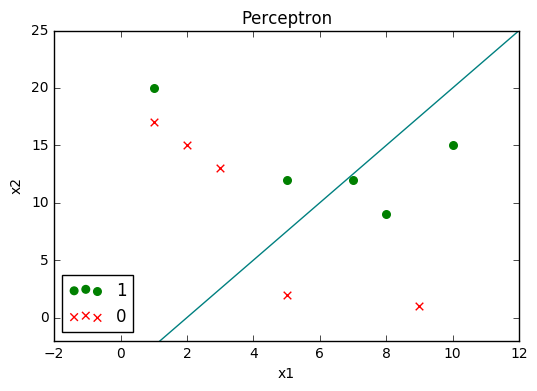

In [4]:
import matplotlib.pyplot as plt 
import matplotlib.cm as cm


X = np.array([[8, 9],
              [5, 12],
              [1, 20],
              [10, 15],
              [7, 12],
              [5, 2],
              [1, 17],
              [2, 15],
              [9, 1],
              [3, 13]])

y = [1, 1, 1, 1, 1, 0, 0, 0, 0, 0]
x_line = np.arange(-5, 25)

w = [5, -2]
b = -10

plt.scatter([i[0] for i in X[:5]], [j[1] for j in X[:5]], s=30, color='g', marker='o', label=1)
plt.scatter([m[0] for m in X[5:]], [n[1] for n in X[5:]], s=30, color='r', marker='x', label=0)
y_line = (-w[0] * x_line - b)/ w[1]  
plt.plot(x_line, y_line, color='teal')
plt.legend(loc='lower left')
axes = plt.gca()
axes.set_xlim([-2, 12])
axes.set_ylim([-2, 25])
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Perceptron')
plt.show()

Blue line representing the weights did not do a good job separating the green and red data points. Next we plot the new boundary for each iteration, with the most recent iteration colored in darkest shade of blue. 

after lastest iteration: w = [ 3.79 -0.2 ] , b = -10.09


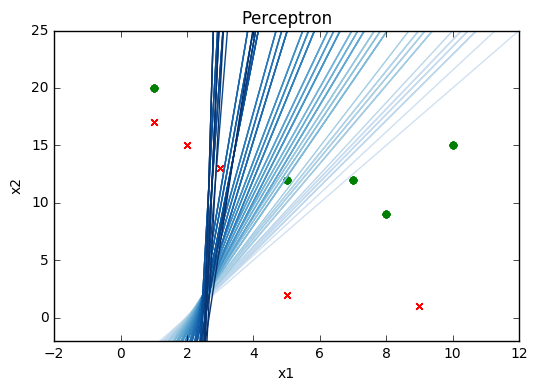

In [5]:
epoch = 10
shade = cm.Blues(np.linspace(0.2, 1, epoch*len(X)))

for i in range(epoch):
    #permute = np.random.permutation(len(X))     
    for j in range(len(X)):
        color = 'r'
        marker = 'x'
        w, b = update_weights(y[j], w, X[j], b, 0.01)
        y_line = (-w[0] * x_line - b)/ w[1]  
        if y[j] == 1:
            color = 'g'
            marker = 'o'
        plt.scatter(X[j][0], X[j][1], color=color, marker=marker)
        plt.plot(x_line, y_line, color=shade[i*len(X)+j])

print('after lastest iteration: w =', w, ', b =', b)

axes = plt.gca()
axes.set_xlim([-2, 12])
axes.set_ylim([-2, 25])
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Perceptron')
plt.show()

### 3. Limitation and Extensibility of Perceptron

A single perceptron algorithm can find a solution to separate binary classes, but it will fail to learn a task where data of two classes cannot be separated by a straight line. For example, perceptron algorithm cannot learn to classify data which represents an XOR operation. However, all logical computations can be constructed with 3 kinds of logic gates (AND, OR, NOT). In other words, by combining multiple perceptrons into a network, we can carry out complex rules and learn to predict a complicated system.   